In [1]:
%load_ext autoreload
%autoreload 1
import numpy as np
from src.data.phantom.materials import load_alma, Material, load_firenze, extract_pigments, get_pigment_dist, create_cnn_phantom
from src.data.phantom.tools import draw_pigments_vis, draw_pigments_nir, compare_distribution_origin_nir, compare_distribution_origin_vis, show_cnn_phantom

# Phantom for CNN
## Using mask extract the pigments from canvas.

In [3]:
vir = '../data/raw/phantoms/TIF.8bit_norm.255/Ch*_VIS_*.tif'
nir = '../data/raw/phantoms/TIF.8bit_norm.255/Ch*_NIR_*.tif'
mask_path = '../data/raw/phantoms/bianco_mask.mat'
mask_name = 'res_2d'
pigments = extract_pigments(vir, nir, mask_path, mask_name)

## Pigments in VIS, divided into clear and underdrawing part

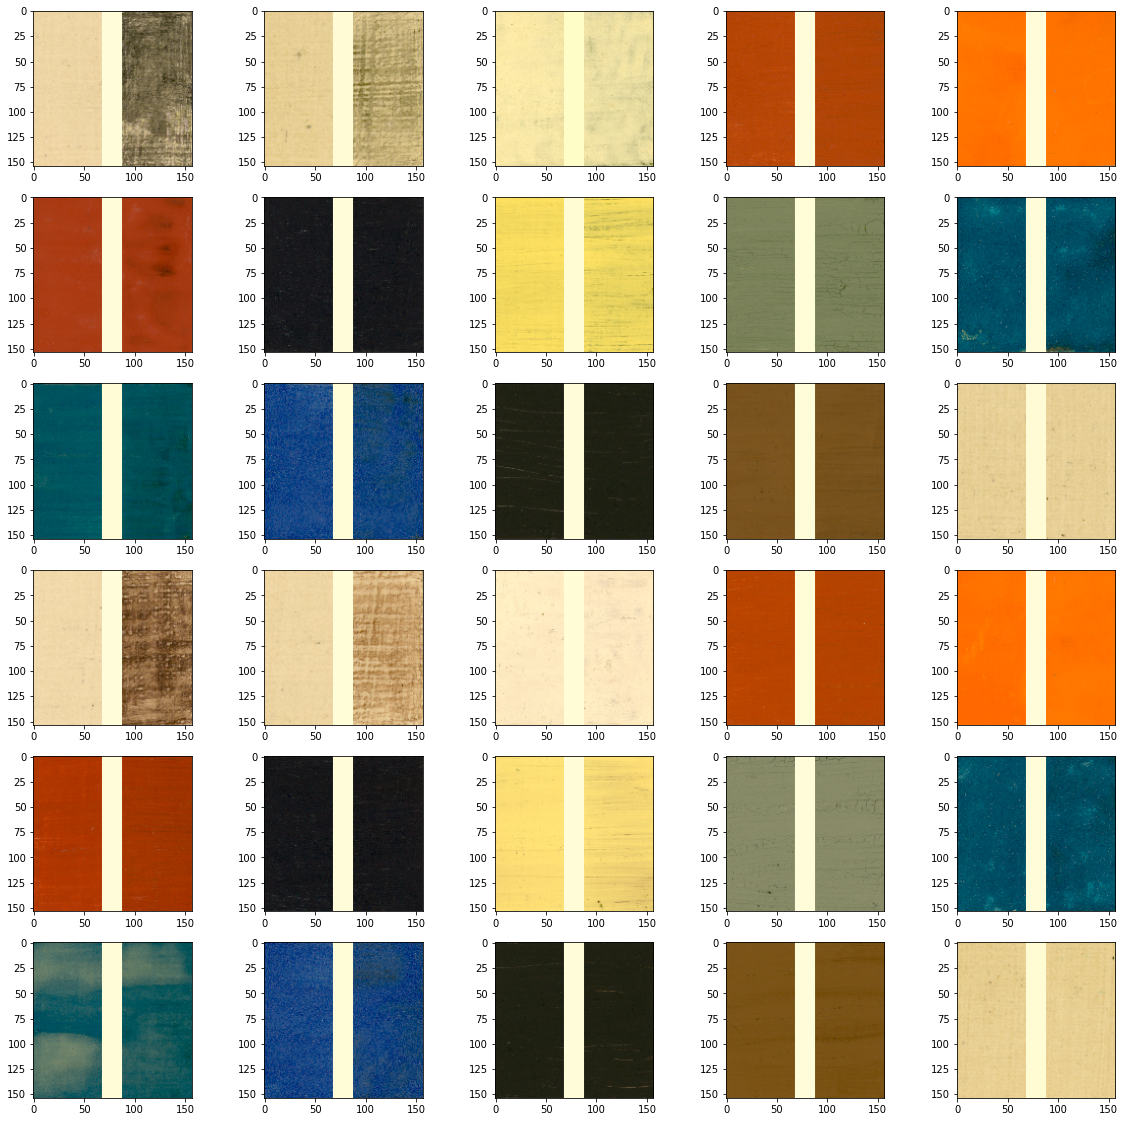

In [4]:
fig = draw_pigments_vis(pigments)

## Same pigments in NIR (25 channel)

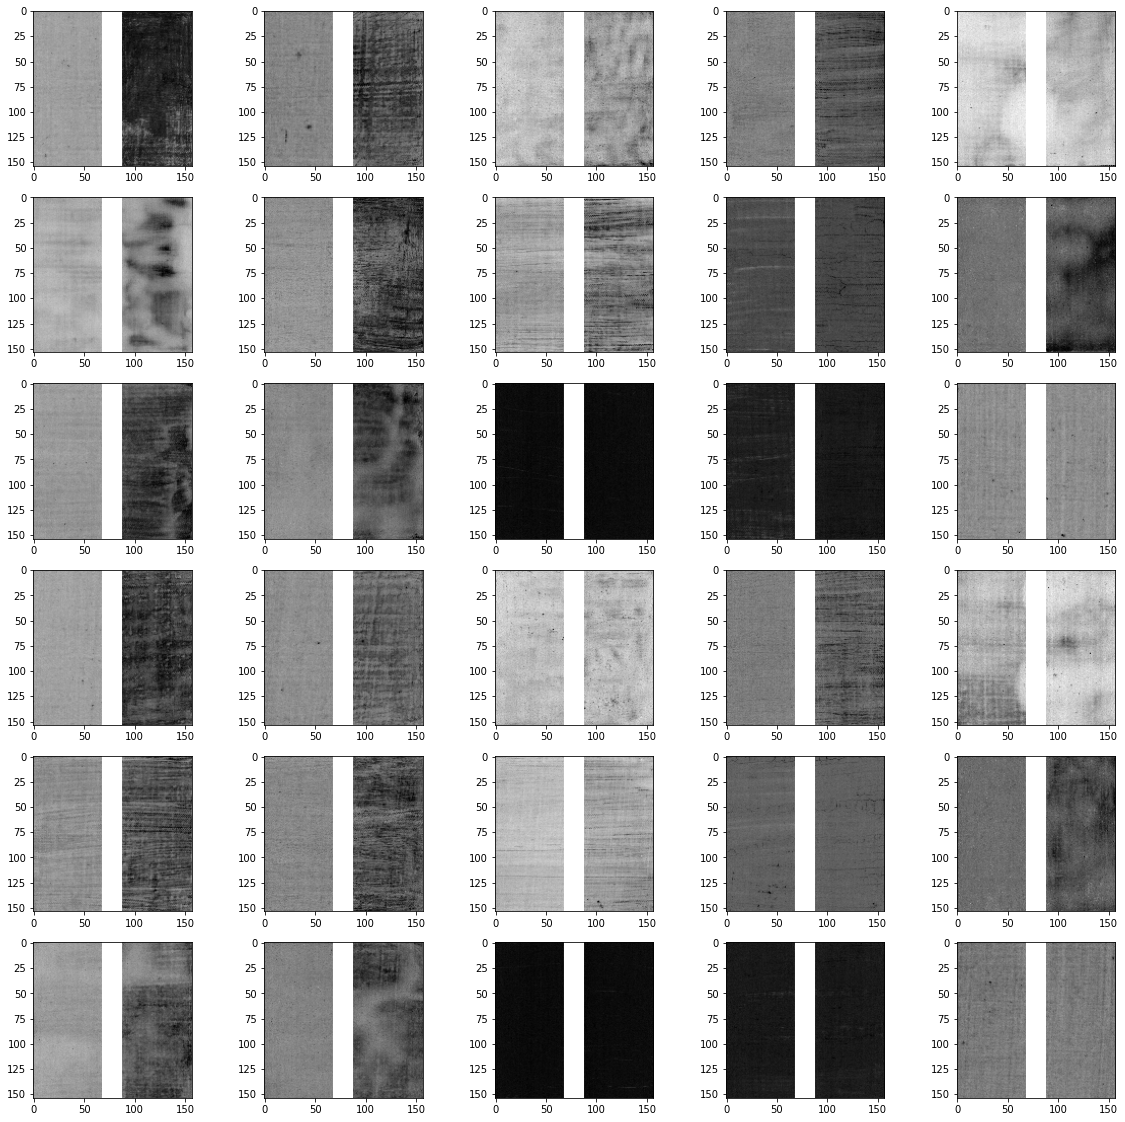

In [5]:
fig = draw_pigments_nir(pigments, 25)

## Calculate distribution of 3x3xdepth for each pigment

In [8]:
pigments_dist = []
for pigment in pigments:
    no_draw, draw = pigment['no_draw'], pigment['draw']
    pigments_dist.append({"draw" : get_pigment_dist(draw),
                          "no_draw" : get_pigment_dist(no_draw)})


## Origin and sampled pigments
### VIS

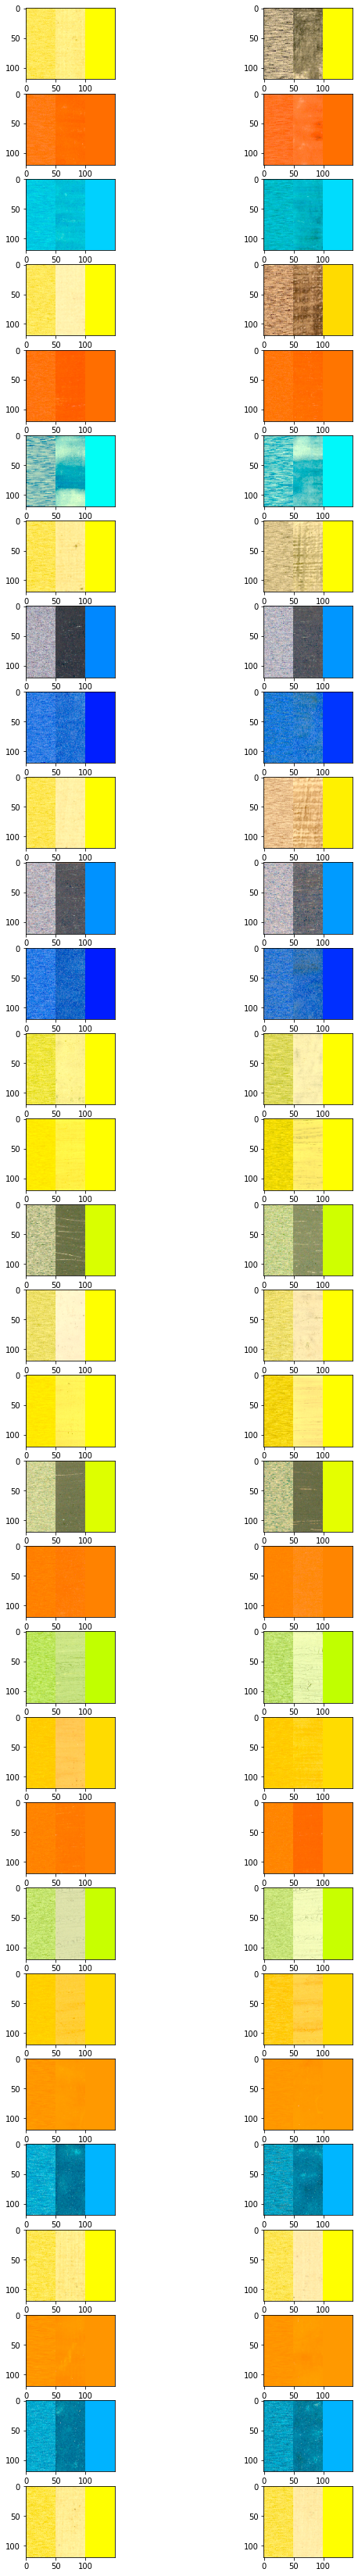

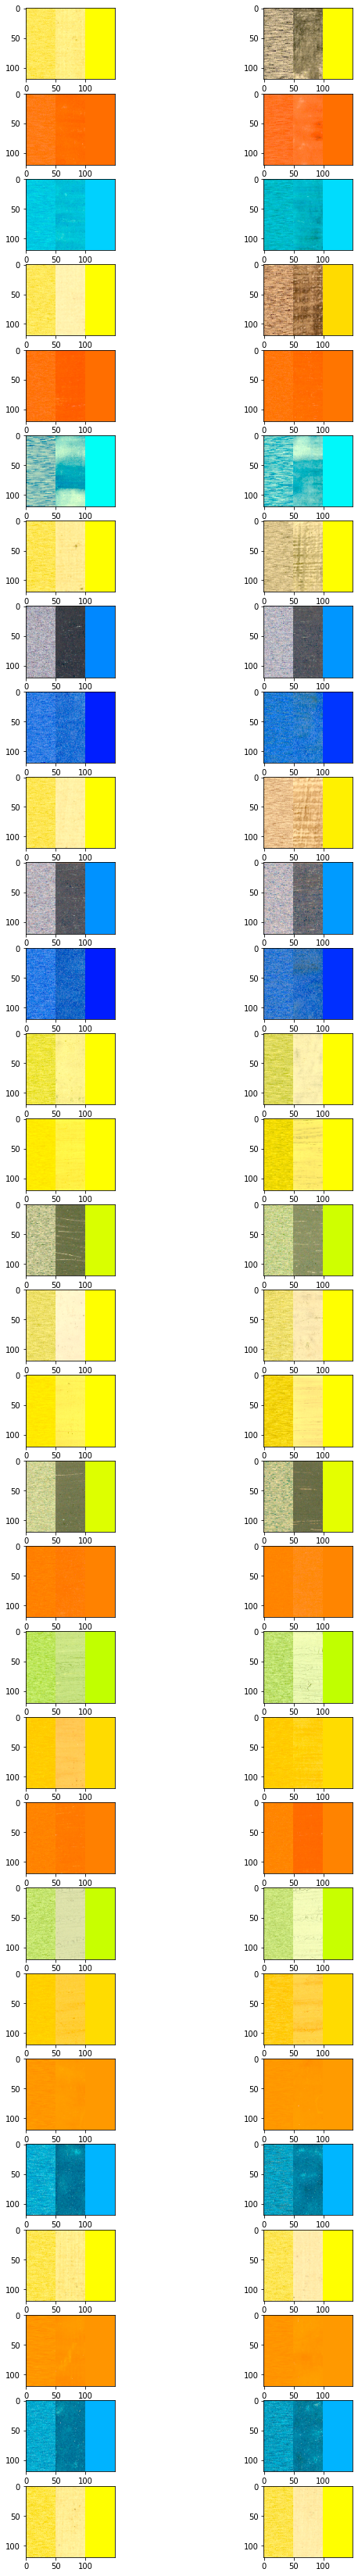

In [6]:
compare_distribution_origin_vis(pigments, pigments_dist)

### NIR

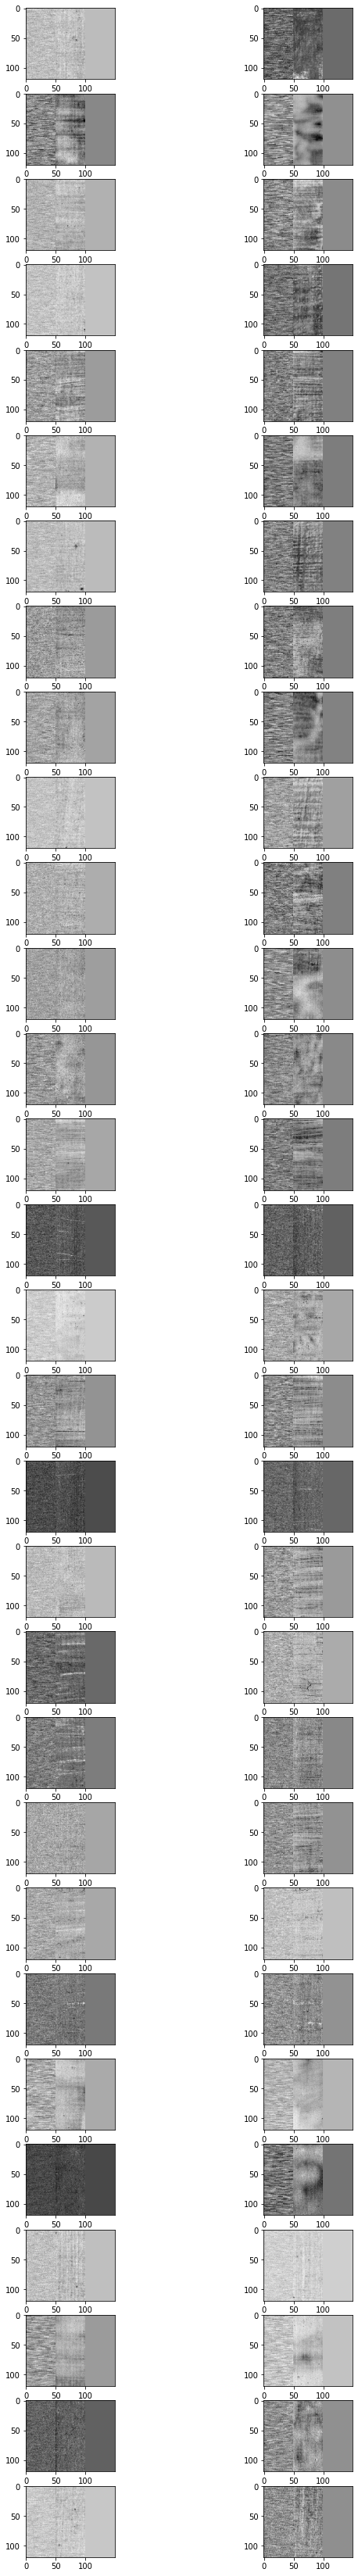

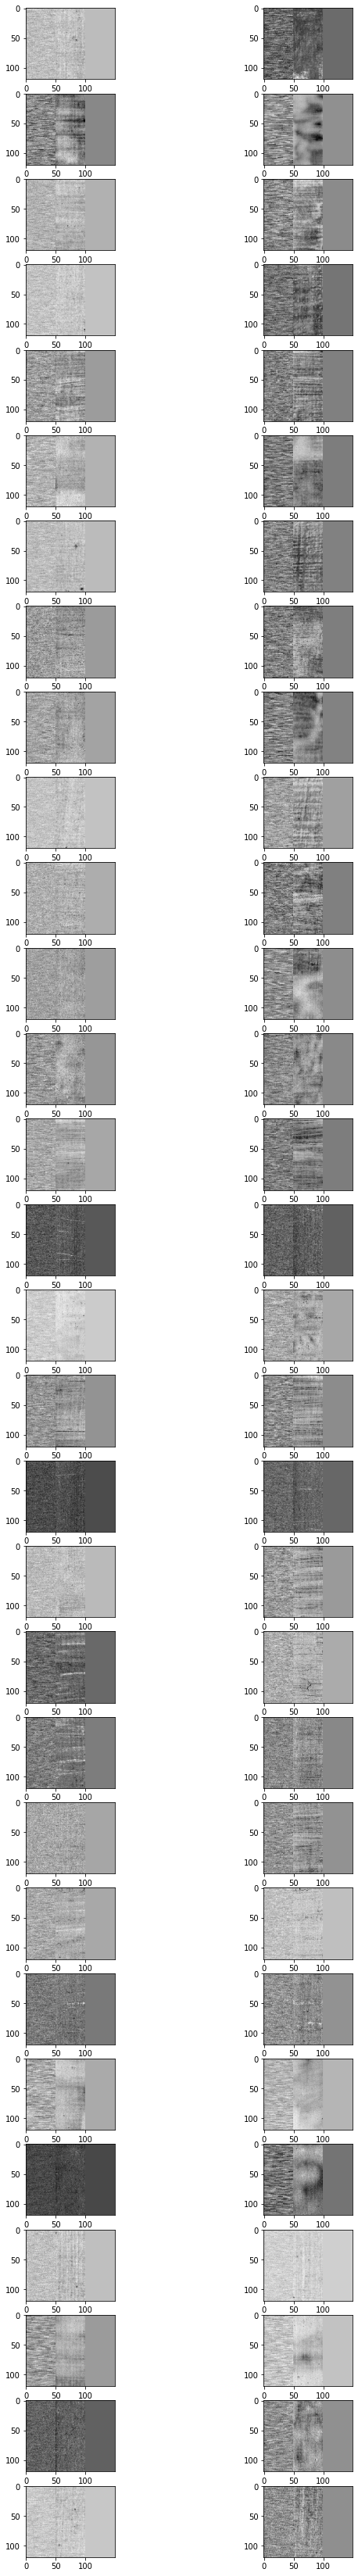

In [7]:
compare_distribution_origin_nir(pigments, pigments_dist)

## Generate phantoms from distribution

In [ ]:
underdrawing_coverage = 0.75
pigments_distribution = pigments_dist
numberSamples = 100
usedMaterials = 40
seed = 42
sample_shape = (3,3,32)
usedMaterials = np.random.randint(0,
                                  len(pigments_distribution),
                                  size=usedMaterials)

cnn_phantoms = create_cnn_phantom(pigments_dist,
                                  used_materials=usedMaterials,
                                  number_samples=numberSamples,
                                  underdrawing_coverage=underdrawing_coverage,
                                  sample_shape=sample_shape,
                                  seed=42)

## View of phantom samples

In [ ]:
res = show_cnn_phantom(cnn_phantoms, 1)

In [ ]:
import pickle
with open('output.pickle', 'rb') as f:
    s = pickle.load(f)
s['config']

## View of phantom samples

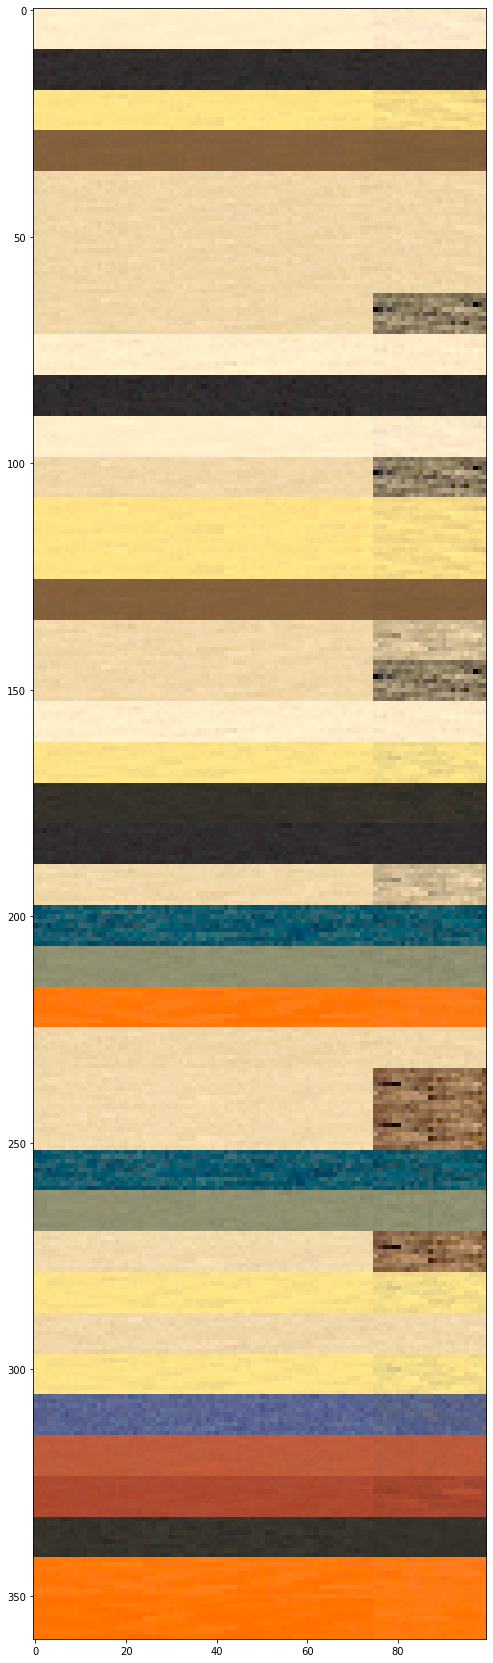

In [24]:
res = show_cnn_phantom(cnn_phantoms, 1)

In [9]:
import pickle
with open('output.pickle', 'rb') as f:
    s = pickle.load(f)
s['config']

{'pad': 1,
 'extractor_args': {'vis_wildcard': '../../data/raw/phantoms/TIF.8bit_norm.255/Ch*_VIS_*.tif',
  'nir_wildcard': '../../data/raw/phantoms/TIF.8bit_norm.255/Ch*_NIR_*.tif',
  'mask_path': '../../data/raw/phantoms/bianco_mask.mat',
  'mask_name': 'res_2d',
  'padding': 6,
  'max_value': 255.0},
 'phantom_args': {'used_materials': [1, 2, 3],
  'underdrawing_coverage': 0.75,
  'number_samples': 100,
  'seed': 42}}